(784, 60000) (60000, 28, 28)


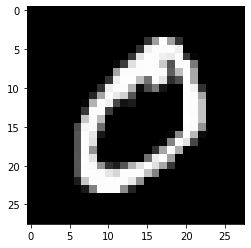

In [1]:

from tensorflow.keras.datasets import mnist
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

my_mnist_x = x_train.reshape(60000, 28*28).T
#my_mnist_x = x_train.reshape(-1, 28*28).T

print(my_mnist_x.shape, x_train.shape)

plt.imshow(x_train[1, :], cmap='gray')  
plt.show()

In [2]:
my_mnist_x
my_mnist_x = my_mnist_x.astype('float32')
my_mnist_x = my_mnist_x / 255

In [3]:
my_mnist_x[:, 1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [4]:
print(my_mnist_x.shape)

(784, 60000)


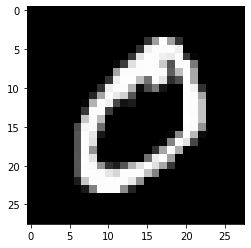

In [5]:
import matplotlib.pyplot as plt

plt.imshow(my_mnist_x[:, 1].reshape(28,28), cmap='gray')  
plt.show()

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from scipy import io

# Data Load
mnist_x = io.loadmat('C:\\Users\\PARK\\Desktop\\train_input.mat')['images']
mnist_x = mnist_x.astype('float32')

In [7]:
print('my_mnist_x.mean: ', np.mean(my_mnist_x), ', my_mnist_x.std: ', np.std(my_mnist_x))
print()
print('mnist_x.mean: ', np.mean(mnist_x), ', mnist_x.std: ', np.std(mnist_x))

my_mnist_x.mean:  0.13066062 , my_mnist_x.std:  0.30810776

mnist_x.mean:  0.1912023 , mnist_x.std:  0.39324808


In [8]:
print(mnist_x)
print(mnist_x.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(784, 60000)


In [9]:
mnist_x[:,0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0.

In [10]:
# Generator
Generator = tf.keras.Sequential([
    tf.keras.layers.Input(256, batch_size=30),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(784, activation='sigmoid')])

In [11]:
# Discriminator
Discriminator = tf.keras.Sequential([
    tf.keras.layers.Input(784),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

In [12]:
# Optimizer
Doptimizer = tf.keras.optimizers.Adam(0.001)
Goptimizer = tf.keras.optimizers.Adam(0.001)

In [13]:
def get_noise(batch_size, n_noise):
    return tf.random.normal([batch_size, n_noise])

@tf.function
def train_step(inputs):

    with tf.GradientTape() as t1, tf.GradientTape() as t2:

        G = Generator(get_noise(30, 256))
    
        Z = Discriminator(G)
        R = Discriminator(inputs)

        loss_D = -tf.reduce_mean(tf.math.log(R) + tf.math.log(1 - Z)) # cross entropy. G 가 D 를 속이지 못 한 경우.
        loss_G = -tf.reduce_mean(tf.math.log(Z)) # cross entropy. G 가 D 를 속인 경우.
          
    Dgradients = t1.gradient(loss_D, Discriminator.trainable_variables)
    Doptimizer.apply_gradients(zip(Dgradients, Discriminator.trainable_variables))
    
    Ggradients = t2.gradient(loss_G, Generator.trainable_variables)
    Goptimizer.apply_gradients(zip(Ggradients, Generator.trainable_variables))

epoch:  1
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_inpu

batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (3

batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (3

batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (3

batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (3

batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (3

batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (3

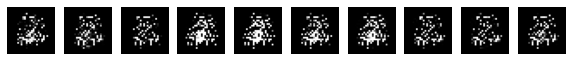

epoch:  2
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_inpu

batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (3

batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (3

batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (3

batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (3

batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (3

batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (3

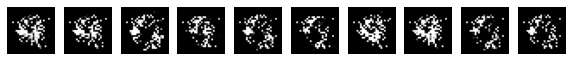

epoch:  3
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_inpu

batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (30, 784)
batch_input.shape (3

KeyboardInterrupt: 

In [14]:
# 학습   
total_batch = int(60000/30)
        
for epoch in tf.range(15): # 7.27 Q. 50 epoch는 왜 고장나지???
    k = 0
    print('epoch: ', int(epoch)+1)
    for i in tf.range(total_batch):
        batch_input = my_mnist_x.T[i*30:(i+1)*30] # 30개 단위의 sample 투입
        print('batch_input.shape', batch_input.shape)
        inputs = tf.Variable(batch_input, tf.float32)
        train_step(inputs)
        k = k + 1
        
        # 생성된 이미지
        if k%2000 == 0:
            G = Generator(get_noise(10, 256)) # 학습된 G 사용 (bathc_size, n_noise)
            
            print('mean: ', np.mean(G), ', std: ', np.std(G))
        
            fig, ax = plt.subplots(1,10 ,figsize=(10, 1))
                
            for j in range(10):
                ax[j].set_axis_off()
                ax[j].imshow(np.reshape(G[j], (28, 28)),cmap='gray')
            plt.pause(0.001)
            plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from scipy import io

# Data Load
mnist_x = io.loadmat('C:\\Users\\PARK\\Desktop\\train_input.mat')['images']
mnist_x = mnist_x.astype('float32')

print(mnist_x)
print(mnist_x.shape)

In [ ]:
mnist_x[:,7]

In [ ]:
plt.imshow(mnist_x[:,7].reshape(28,28), cmap='gray')  
plt.show()